In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample multi-label multi-class dataframe

In [44]:
df = pd.DataFrame({'label1':['A', 'B', 'B', 'C', 'C', 'C'], 'label2':['D', 'D', 'D', 'E', 'F', 'G']}, dtype='category')
df

,label1,label2
0,A,D
1,B,D
2,B,D
3,C,E
4,C,F
5,C,G


# Unique classes per label

In [45]:
df.apply(pd.Series.nunique)

label1    3
label2    4
dtype: int64

# From labels to dummy variables

In [46]:
y = pd.get_dummies(df)
y

,label1_A,label1_B,label1_C,label2_D,label2_E,label2_F,label2_G
0,1,0,0,1,0,0,0
1,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0
3,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0
5,0,0,1,0,0,0,1


# Class indices to the dummy variables

In [47]:
lbl_margins = df.apply(pd.Series.nunique).cumsum()
class_indices = [list(range(start, stop)) for start, stop in zip(np.concatenate(([0], lbl_margins[:-1])), lbl_margins)]
class_indices

[[0, 1, 2], [3, 4, 5, 6]]

# Accessing classes per label

In [48]:
for lbl, cls in enumerate(class_indices):
    print('Label:',df.columns[lbl])
    display(y.iloc[:,class_indices[lbl]])

Label: label1


,label1_A,label1_B,label1_C
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
5,0,0,1


Label: label2


,label2_D,label2_E,label2_F,label2_G
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0
5,0,0,0,1


# Dummy sums

## Column sums: class frequency

In [49]:
y.sum()

label1_A    1
label1_B    2
label1_C    3
label2_D    3
label2_E    1
label2_F    1
label2_G    1
dtype: int64

## Row sums: always sum up to the number of labels

In [50]:
y.sum(axis=1)

0    2
1    2
2    2
3    2
4    2
5    2
dtype: int64

## Column sums by label: label frequency = number of rows

In [51]:
{df.columns[lbl]: y.iloc[:,cls].sum().sum() for lbl, cls in enumerate(class_indices)}

{'label1': 6, 'label2': 6}

# Dummy averages

## Column averages: class probabilities 

In [12]:
y.mean()

label1_A    0.166667
label1_B    0.333333
label1_C    0.500000
label2_D    0.500000
label2_E    0.166667
label2_F    0.166667
label2_G    0.166667
dtype: float64

## Product of column averages: Joint probability

In [64]:
y.mean().prod()

,label1_A,label1_B,label1_C,label2_D,label2_E,label2_F,label2_G
0,1,0,0,1,0,0,0
1,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0
3,0,0,1,0,1,0,0
4,0,0,1,0,0,1,0
5,0,0,1,0,0,0,1


## Row averages: allways averages to labels / classes ratio

In [13]:
len(df.columns)/len(y.columns)

0.2857142857142857

In [14]:
y.mean(axis=1)

0    0.285714
1    0.285714
2    0.285714
3    0.285714
4    0.285714
5    0.285714
dtype: float64

## Column averages by label: label probabilities

In [61]:
{df.columns[lbl]: y.iloc[:,cls].values.mean() for lbl, cls in enumerate(class_indices)}

{'label1': 0.3333333333333333, 'label2': 0.25}

## Product of column of averages: product of class probabilities

In [62]:
{df.columns[lbl]: y.iloc[:,cls].mean() for lbl, cls in enumerate(class_indices)}

{'label1': label1_A    0.166667
 label1_B    0.333333
 label1_C    0.500000
 dtype: float64, 'label2': label2_D    0.500000
 label2_E    0.166667
 label2_F    0.166667
 label2_G    0.166667
 dtype: float64}

## Row product of averages: product of label probabilities

In [18]:
{df.columns[lbl]: y.iloc[:,cls].mean(axis=1).prod() for lbl, cls in enumerate(class_indices)}

{'label1': 0.001371742112482853, 'label2': 0.000244140625}

# Random classes and train-test split simulation

<IPython.core.display.Javascript object>


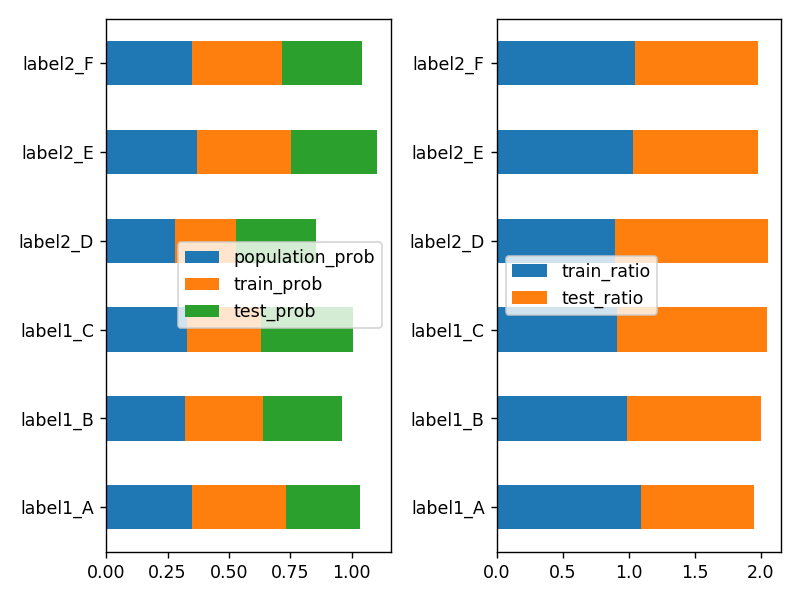

In [41]:
%matplotlib notebook
n = 100
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#plt.ion()
for i in range(100):
    rng = np.random.RandomState()
    df = pd.DataFrame({'label1':rng.choice(['A','B','C'], n),
                       'label2':rng.choice(['D', 'E', 'F'], n)}, dtype='category')
    y=pd.get_dummies(df)
    indices = rng.choice(y.index, size=np.floor(y.shape[0]/2).astype('int'))
    test_mask = y.index.isin(indices)
    test = y[test_mask]
    train = y[~test_mask]
    mle = pd.concat({'population_prob':y.mean(), 'train_prob':train.mean(), 'test_prob':test.mean()}, axis=1)
    ratios=pd.DataFrame()
    ratios['train_ratio'] = mle.train_prob / mle.population_prob
    ratios['test_ratio'] = mle.test_prob / mle.population_prob
    ax1.clear()
    ax2.clear()
    mle.plot(kind='barh', stacked=True, ax=ax1)
    ratios.plot(kind='barh', stacked=True, ax=ax2)
    ax1.legend(loc='center right')
    ax2.legend(loc='center left')
    plt.tight_layout()
    fig.canvas.draw()
#plt.ioff()